In [1]:
### python 3.5 version
### virtualEnv_name is helloTF

import tensorflow as tf
tf.__version__

'1.6.0'

# 설치 및 테스트

In [2]:
# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, TensorFlow!")

# seart a TF session
sess = tf.Session()

# run the op and get result
print(sess.run(hello))

b'Hello, TensorFlow!'


In [3]:
## 더하기 예제
# Build graph (tensor) using TensorFlow operations
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

In [4]:
print("node1: {} node2: {}".format(node1,node2))
print("node3: {}".format(node3))

node1: Tensor("Const_1:0", shape=(), dtype=float32) node2: Tensor("Const_2:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


In [5]:
# feed data and run graph (operation) sess.run(op)
sess = tf.Session() 
print("sess.run(node1, node2): ".format(sess.run([node1, node2])))
print("sess.run(node3): ", sess.run(node3))

sess.run(node1, node2): 
sess.run(node3):  7.0


In [6]:
# placeholder(상수가 아닌 변수를 만들어줌)
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provides a shortcut for tf.add(a,b)

print(sess.run(adder_node, feed_dict={a: 3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))

7.5
[3. 7.]


# Lab2 Linear Reression

In [7]:
### Lab2
### Linear Regression

## 1. Build graph using TF operations
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# tf.Variable의 의미는 tesnsorflow가 사용하는 변수라는 의미 or trainable variable
w = tf.Variable(tf.random_normal([1]), name='weight') # 1차원 array에 대한 랜덤값을 넣어줌
b = tf.Variable(tf.random_normal([1]), name='bias')
# Our hypothesis Xw+b
hypothesis = x_train * w + b

In [8]:
# cost/loss funtion
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) # 평균을 내줌

In [9]:
# Minimize(GradientDescent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [10]:
## 2. Run/update graph and get results
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph - 사용하기 전에 변수 초기화가 필요함.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 3.292628 [0.4223469] [-0.59688455]
20 0.040492564 [1.0533676] [-0.30318838]
40 0.010029891 [1.1083598] [-0.26364508]
60 0.008866808 [1.1087426] [-0.24884623]
80 0.0080507845 [1.1041534] [-0.23692206]
100 0.007311826 [1.099308] [-0.22576568]
120 0.006640714 [1.0946457] [-0.21515341]
140 0.0060312035 [1.0901982] [-0.2050418]
160 0.0054776366 [1.0859592] [-0.19540554]
180 0.0049748686 [1.0819196] [-0.18622223]
200 0.0045182644 [1.0780696] [-0.17747052]
220 0.0041035623 [1.0744005] [-0.16913004]
240 0.0037269213 [1.0709039] [-0.16118151]
260 0.0033848525 [1.0675718] [-0.15360653]
280 0.0030741699 [1.0643961] [-0.14638759]
300 0.0027920029 [1.0613698] [-0.1395079]
320 0.0025357413 [1.0584855] [-0.13295142]
340 0.0023029945 [1.0557369] [-0.12670316]
360 0.0020916231 [1.0531174] [-0.12074853]
380 0.0018996444 [1.0506212] [-0.11507381]
400 0.0017252839 [1.0482421] [-0.10966577]
420 0.0015669334 [1.045975] [-0.10451189]
440 0.0014231144 [1.0438143] [-0.09960023]
460 0.0012924998 [1.0417554] [

In [11]:
# Now we can use x and y in place of x_data and y_data
# # placeholders for a tensor that will be always fed using feed_dict
# See http://stackoverflow.com/questions/336693740/
w = tf.Variable(tf.random_normal([1]), name='weight') # 1차원 array에 대한 랜덤값을 넣어줌
b = tf.Variable(tf.random_normal([1]), name='bias')
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis xw+b
hypothesis = x * w + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y)) # 평균을 내줌

# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# launch the graph in a session
sess = tf.Session()
# initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# fit the line with new training data
for step in range(2001):
    cost_val, w_val, b_val, _ = sess.run([cost, w , b, train],
                                        feed_dict={x: [1,2,3,4,5], y:[2.1,3.1,4.1,5.1,6.1]}) # _ 변수는 필요없다는 의미
    if step % 20 == 0:
        print(step, cost_val, w_val, b_val)
        
# Testing our model
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[5]}))
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[2.5]}))
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[1.5, 3.5]}))

0 20.573835 [0.64278686] [-1.303836]
20 0.7337642 [1.5498061] [-0.90165704]
40 0.6404503 [1.51779] [-0.7694616]
60 0.5593098 [1.4838976] [-0.64702404]
80 0.48844957 [1.4522067] [-0.53261]
100 0.42656654 [1.4225913] [-0.425689]
120 0.37252384 [1.3949156] [-0.32577047]
140 0.3253277 [1.3690522] [-0.23239556]
160 0.28411108 [1.3448826] [-0.14513597]
180 0.24811646 [1.322296] [-0.063591]
200 0.2166818 [1.3011887] [0.01261349]
220 0.18922988 [1.2814635] [0.08382723]
240 0.16525589 [1.2630302] [0.15037727]
260 0.14431915 [1.2458041] [0.21256888]
280 0.12603498 [1.2297062] [0.27068752]
300 0.110067226 [1.2146626] [0.3249999]
320 0.09612248 [1.2006041] [0.37575534]
340 0.08394455 [1.1874664] [0.42318666]
360 0.0733094 [1.1751891] [0.46751168]
380 0.06402163 [1.1637157] [0.50893384]
400 0.055910587 [1.1529939] [0.5476433]
420 0.048827123 [1.1429743] [0.58381754]
440 0.042641114 [1.1336108] [0.61762273]
460 0.037238784 [1.1248605] [0.649214]
480 0.032520913 [1.1166832] [0.67873627]
500 0.0284007

# Lab3 Cost function minimize

In [12]:
### lab3
## 경사하강법이 잘 적용되는지 확인
import matplotlib.pyplot as plt

x=[1,2,3]
y=[1,2,3]

w = tf.placeholder(tf.float32)
# Our hypothesis f or linear model X*W
hypothesis = x*w

In [13]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-y))

In [14]:
# Launch the graph in a session.
sess = tf.Session()
# Initializess global variables in the graph.
sess.run(tf.global_variables_initializer())

In [15]:
# Variables for plotting cost function
w_val = []
cost_val = []
for i in range(-30, 50):
    feed_w = i * 0.1
    curr_cost, curr_w = sess.run([cost, w], feed_dict={w: feed_w})
    w_val.append(curr_w)
    cost_val.append(curr_cost)

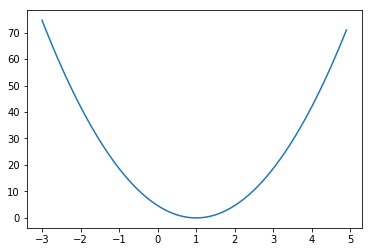

In [16]:
# Show the cost function
plt.plot(w_val, cost_val)
plt.show()

In [17]:
## 최소화 모델
x_data = [1,2,3]
y_data = [1,2,3]

w = tf.Variable(tf.random_normal([1]), name='weight')
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [18]:
# Our hypothesis for linear model X*W
hypothesis = x*w
# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - y))

In [19]:
# Minimize : Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((w*x - y) * x)
descent = w - learning_rate * gradient
update = w.assign(descent)
## 위의 4단계는 optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)// train=optimizer.minimize(cost) 과 같은 코드이다.

In [20]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={x:x_data, y:y_data})
    print(step, sess.run(cost, feed_dict={x:x_data, y:y_data}), sess.run(w))

0 4.8403845 [0.4120019]
1 1.3768203 [0.686401]
2 0.3916289 [0.8327472]
3 0.11139658 [0.91079855]
4 0.03168615 [0.9524259]
5 0.009012932 [0.97462714]
6 0.002563699 [0.9864678]
7 0.00072922534 [0.99278283]
8 0.000207426 [0.99615085]
9 5.899907e-05 [0.99794716]
10 1.6780774e-05 [0.9989052]
11 4.772938e-06 [0.9994161]
12 1.3579896e-06 [0.99968857]
13 3.8627394e-07 [0.9998339]
14 1.09767896e-07 [0.9999114]
15 3.1294594e-08 [0.99995273]
16 8.890556e-09 [0.9999748]
17 2.5500668e-09 [0.9999865]
18 7.162271e-10 [0.99999285]
19 2.0372681e-10 [0.9999962]
20 5.8960836e-11 [0.999998]


In [21]:
## test
x = [1,2,3]
y = [1,2,3]
# set wrong model weights
w = tf.Variable(5.0)
# Linear model
hypothesis = x*w
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y))

In [22]:
# Minimize : Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

In [23]:
# Launch the graph in a session
sess = tf.Session()
#Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [24]:
for step in range(100):
    print(step, sess.run(w))
    sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


In [25]:
### Optional: compute_gradient and apply_gradient
x = [1,2,3]
y = [1,2,3]
# set wrong model weights
w = tf.Variable(5.)
# Linear model
hypothesis = x*w
# Manual gradient
gradient = tf.reduce_mean((w*x-y)*x)*2
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost,[w])
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, w, gvs]))
    sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.84889, 4.6266665, [(33.84889, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228264, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.738752, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.361395, [(12.706352, 2.361395)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445186, 2.119127)]]
14 [9.470302, 2.0146751, [(9.470302, 2.0146751)]]
15 [8.586407, 1.9199722, [(8.586407, 1.9199722)]]
16 [7.785009, 1.8341081, [(7.785009, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.399624, 1.685674, [(6.399624, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023257, 1.6216778)]]
20 

# Lab4 Multi-variable linear regression

In [26]:
x1_data = [74., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

In [27]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y))
# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [28]:
# Launch the graph in a session.
# 매트릭스 사용 전
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n",hy_val)

0 Cost:  12497.912 
Prediction:
 [251.27452 303.08698 297.75992 327.7674  228.36868]
10 Cost:  7.519942 
Prediction:
 [152.03906 184.33823 180.75145 200.34851 137.79453]
20 Cost:  7.3921814 
Prediction:
 [151.73723 183.98663 180.39949 199.96475 137.52942]
30 Cost:  7.3764296 
Prediction:
 [151.7315  183.98936 180.39667 199.96123 137.53458]
40 Cost:  7.3607254 
Prediction:
 [151.72668 183.99315 180.39488 199.95883 137.54053]
50 Cost:  7.3450623 
Prediction:
 [151.7219  183.99692 180.39313 199.95644 137.54648]
60 Cost:  7.329524 
Prediction:
 [151.7171  184.0007  180.39136 199.95407 137.5524 ]
70 Cost:  7.313987 
Prediction:
 [151.71233 184.00446 180.38962 199.95168 137.55832]
80 Cost:  7.298547 
Prediction:
 [151.70757 184.00822 180.38786 199.94931 137.56422]
90 Cost:  7.2831893 
Prediction:
 [151.7028  184.01193 180.3861  199.94693 137.5701 ]
100 Cost:  7.2678237 
Prediction:
 [151.69807 184.01569 180.38437 199.94455 137.57599]
110 Cost:  7.2526193 
Prediction:
 [151.69336 184.01942 18

1160 Cost:  5.950583 
Prediction:
 [151.26418 184.3608  180.22467 199.71278 138.1312 ]
1170 Cost:  5.9405947 
Prediction:
 [151.26067 184.36362 180.22339 199.71078 138.13586]
1180 Cost:  5.930621 
Prediction:
 [151.25719 184.36642 180.2221  199.70876 138.1405 ]
1190 Cost:  5.9207215 
Prediction:
 [151.2537  184.36922 180.22083 199.70674 138.14513]
1200 Cost:  5.910849 
Prediction:
 [151.25023 184.37202 180.21953 199.70474 138.14975]
1210 Cost:  5.9009843 
Prediction:
 [151.24675 184.37482 180.21826 199.70273 138.15437]
1220 Cost:  5.891172 
Prediction:
 [151.2433  184.37762 180.21701 199.70073 138.15898]
1230 Cost:  5.8814163 
Prediction:
 [151.23985 184.38036 180.2157  199.69872 138.16356]
1240 Cost:  5.8716745 
Prediction:
 [151.2364  184.38312 180.21442 199.6967  138.16814]
1250 Cost:  5.8620057 
Prediction:
 [151.23299 184.38591 180.21318 199.69473 138.17271]
1260 Cost:  5.8523383 
Prediction:
 [151.22958 184.38866 180.21193 199.69273 138.17728]
1270 Cost:  5.8427086 
Prediction:
 

In [29]:
# 매트릭스 사용(리스트 사용)
x_data = [[73., 80., 75.], [93., 88., 93.], [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

In [30]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  35250.74 
Prediction:
 [[-15.718021]
 [-15.514286]
 [-17.253162]
 [-15.520992]
 [-13.783276]]
10 Cost:  4.6672106 
Prediction:
 [[150.35762]
 [184.10095]
 [179.42877]
 [198.66003]
 [138.47462]]
20 Cost:  4.3398385 
Prediction:
 [[150.85765]
 [184.70668]
 [180.02322]
 [199.30667]
 [138.93837]]
30 Cost:  4.3351808 
Prediction:
 [[150.85675]
 [184.71027]
 [180.0244 ]
 [199.3073 ]
 [138.94286]]
40 Cost:  4.3305154 
Prediction:
 [[150.85432]
 [184.71204]
 [180.02377]
 [199.30592]
 [138.94592]]
50 Cost:  4.325901 
Prediction:
 [[150.8519 ]
 [184.71379]
 [180.02315]
 [199.30458]
 [138.94899]]
60 Cost:  4.3212767 
Prediction:
 [[150.84947]
 [184.71552]
 [180.02252]
 [199.3032 ]
 [138.95204]]
70 Cost:  4.316663 
Prediction:
 [[150.84708]
 [184.71727]
 [180.0219 ]
 [199.30185]
 [138.9551 ]]
80 Cost:  4.312059 
Prediction:
 [[150.84468]
 [184.71901]
 [180.02129]
 [199.30049]
 [138.95815]]
90 Cost:  4.3075037 
Prediction:
 [[150.84229]
 [184.72073]
 [180.02066]
 [199.29915]
 [138.96118]]


940 Cost:  3.9700363 
Prediction:
 [[150.6644 ]
 [184.85042]
 [179.97598]
 [199.19054]
 [139.19574]]
950 Cost:  3.9665885 
Prediction:
 [[150.66258]
 [184.85175]
 [179.97552]
 [199.18933]
 [139.19824]]
960 Cost:  3.9631348 
Prediction:
 [[150.66075]
 [184.85307]
 [179.97508]
 [199.18811]
 [139.20074]]
970 Cost:  3.9597058 
Prediction:
 [[150.65895]
 [184.8544 ]
 [179.97466]
 [199.1869 ]
 [139.20323]]
980 Cost:  3.9562767 
Prediction:
 [[150.65717]
 [184.85573]
 [179.97421]
 [199.18571]
 [139.20573]]
990 Cost:  3.9528759 
Prediction:
 [[150.65536]
 [184.85704]
 [179.97379]
 [199.18451]
 [139.2082 ]]
1000 Cost:  3.9494736 
Prediction:
 [[150.65358]
 [184.85837]
 [179.97336]
 [199.18332]
 [139.2107 ]]
1010 Cost:  3.9460838 
Prediction:
 [[150.65181]
 [184.85968]
 [179.97293]
 [199.18211]
 [139.21315]]
1020 Cost:  3.9427013 
Prediction:
 [[150.65004]
 [184.861  ]
 [179.9725 ]
 [199.18092]
 [139.21562]]
1030 Cost:  3.9393249 
Prediction:
 [[150.64827]
 [184.86229]
 [179.97208]
 [199.17973]


1890 Cost:  3.6821208 
Prediction:
 [[150.51611]
 [184.96051]
 [179.94128]
 [199.08203]
 [139.41064]]
1900 Cost:  3.6794484 
Prediction:
 [[150.51479]
 [184.9615 ]
 [179.941  ]
 [199.08095]
 [139.41269]]
1910 Cost:  3.6767929 
Prediction:
 [[150.51346]
 [184.96248]
 [179.94067]
 [199.07985]
 [139.4147 ]]
1920 Cost:  3.6741707 
Prediction:
 [[150.51215]
 [184.96347]
 [179.9404 ]
 [199.0788 ]
 [139.41673]]
1930 Cost:  3.6715055 
Prediction:
 [[150.51085]
 [184.96446]
 [179.94011]
 [199.07771]
 [139.41876]]
1940 Cost:  3.6688774 
Prediction:
 [[150.50955]
 [184.96545]
 [179.93983]
 [199.07664]
 [139.42078]]
1950 Cost:  3.666219 
Prediction:
 [[150.50826]
 [184.96643]
 [179.93954]
 [199.07556]
 [139.4228 ]]
1960 Cost:  3.6635883 
Prediction:
 [[150.50697]
 [184.9674 ]
 [179.93927]
 [199.0745 ]
 [139.42482]]
1970 Cost:  3.660996 
Prediction:
 [[150.50566]
 [184.96837]
 [179.93896]
 [199.07343]
 [139.42682]]
1980 Cost:  3.6583874 
Prediction:
 [[150.50438]
 [184.96935]
 [179.93869]
 [199.072

In [31]:
## 파일 불러와서 작업하기 연습
import numpy as np
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1] # 0:-1은 마지막 열을 제외하고 모두 가져온다는 뜻
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

# placeholders for a tensor that wil be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

(6, 3) [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]] 6
(6, 1) [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]]


In [32]:
# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [33]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
# Set up feed_dict variables inside the loop.
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  14201.231 
Prediction:
 [[40.457897]
 [49.663734]
 [48.67554 ]
 [50.92522 ]
 [39.625134]
 [25.657959]]
10 Cost:  1.1394753 
Prediction:
 [[151.55342]
 [183.23201]
 [180.2616 ]
 [194.22594]
 [141.50838]
 [100.76718]]
20 Cost:  0.48799184 
Prediction:
 [[152.3051  ]
 [184.13692 ]
 [181.15244 ]
 [195.19635 ]
 [142.19872 ]
 [101.276596]]
30 Cost:  0.4878029 
Prediction:
 [[152.3095 ]
 [184.14336]
 [181.15817]
 [195.20284]
 [142.20374]
 [101.2808 ]]
40 Cost:  0.48764387 
Prediction:
 [[152.30882 ]
 [184.14372 ]
 [181.15791 ]
 [195.20276 ]
 [142.20409 ]
 [101.281555]]
50 Cost:  0.48747852 
Prediction:
 [[152.30814]
 [184.14404]
 [181.15761]
 [195.20268]
 [142.20444]
 [101.2823 ]]
60 Cost:  0.4873257 
Prediction:
 [[152.30743]
 [184.14435]
 [181.1573 ]
 [195.20256]
 [142.20476]
 [101.28304]]
70 Cost:  0.48715398 
Prediction:
 [[152.30673 ]
 [184.14468 ]
 [181.157   ]
 [195.20248 ]
 [142.20511 ]
 [101.283775]]
80 Cost:  0.48699316 
Prediction:
 [[152.30603]
 [184.14499]
 [181.1567 ]
 

940 Cost:  0.47605172 
Prediction:
 [[152.2539 ]
 [184.1682 ]
 [181.13388]
 [195.19618]
 [142.22891]
 [101.3402 ]]
950 Cost:  0.47595954 
Prediction:
 [[152.25339]
 [184.16843]
 [181.13367]
 [195.19612]
 [142.22913]
 [101.34076]]
960 Cost:  0.47585478 
Prediction:
 [[152.25285]
 [184.16867]
 [181.13344]
 [195.19608]
 [142.22934]
 [101.34134]]
970 Cost:  0.4757549 
Prediction:
 [[152.25235]
 [184.1689 ]
 [181.13321]
 [195.19603]
 [142.22957]
 [101.34189]]
980 Cost:  0.47566223 
Prediction:
 [[152.25185 ]
 [184.16914 ]
 [181.133   ]
 [195.19598 ]
 [142.22981 ]
 [101.342476]]
990 Cost:  0.47555807 
Prediction:
 [[152.25131]
 [184.16936]
 [181.13275]
 [195.19594]
 [142.23001]
 [101.34304]]
1000 Cost:  0.47545886 
Prediction:
 [[152.25081]
 [184.16959]
 [181.13252]
 [195.19589]
 [142.23024]
 [101.34359]]
1010 Cost:  0.4753571 
Prediction:
 [[152.25026]
 [184.1698 ]
 [181.13228]
 [195.19583]
 [142.23044]
 [101.34415]]
1020 Cost:  0.47526217 
Prediction:
 [[152.24976]
 [184.17003]
 [181.13205

1940 Cost:  0.46804953 
Prediction:
 [[152.20905]
 [184.18759]
 [181.1138 ]
 [195.19293]
 [142.24634]
 [101.38987]]
1950 Cost:  0.46799073 
Prediction:
 [[152.20868]
 [184.18777]
 [181.11365]
 [195.19292]
 [142.24648]
 [101.39031]]
1960 Cost:  0.46791962 
Prediction:
 [[152.2083 ]
 [184.18794]
 [181.11346]
 [195.1929 ]
 [142.2466 ]
 [101.39073]]
1970 Cost:  0.46786472 
Prediction:
 [[152.20792]
 [184.1881 ]
 [181.1133 ]
 [195.19287]
 [142.24673]
 [101.39116]]
1980 Cost:  0.46780303 
Prediction:
 [[152.20753]
 [184.18825]
 [181.11311]
 [195.19284]
 [142.24686]
 [101.39159]]
1990 Cost:  0.4677336 
Prediction:
 [[152.20715 ]
 [184.1884  ]
 [181.11293 ]
 [195.19284 ]
 [142.247   ]
 [101.392006]]
2000 Cost:  0.4676763 
Prediction:
 [[152.20679]
 [184.18857]
 [181.11278]
 [195.19283]
 [142.24712]
 [101.39243]]


In [34]:
# Ask mys score
print("Your score will be ", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))
print("Other score will be ", sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

Your score will be  [[180.16406]]
Other score will be  [[125.771095]
 [189.47423 ]]


# Lab5 Logistic Classification

In [35]:
## logistic regression
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

# placeholders for a tensor that will be always fed
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W) + b))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [36]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [37]:
## Train the model
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)
    
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 3.3448765
200 0.45713088
400 0.36006418
600 0.3168845
800 0.2937043
1000 0.2789574
1200 0.2682178
1400 0.25958943
1600 0.25218365
1800 0.2455527
2000 0.23945719
2200 0.23376222
2400 0.22838758
2600 0.22328277
2800 0.21841423
3000 0.21375807
3200 0.2092963
3400 0.20501496
3600 0.20090193
3800 0.19694714
4000 0.19314156
4200 0.18947707
4400 0.18594609
4600 0.18254177
4800 0.17925774
5000 0.17608792
5200 0.1730268
5400 0.17006904
5600 0.16720979
5800 0.16444446
6000 0.16176854
6200 0.15917803
6400 0.15666896
6600 0.15423773
6800 0.15188095
7000 0.14959528
7200 0.14737763
7400 0.14522508
7600 0.14313497
7800 0.14110458
8000 0.1391315
8200 0.13721333
8400 0.13534792
8600 0.13353314
8800 0.13176696
9000 0.13004754
9200 0.12837304
9400 0.12674177
9600 0.12515208
9800 0.12360242
10000 0.12209132

Hypothesis:  [[0.02011663]
 [0.14133076]
 [0.24905391]
 [0.8081869 ]
 [0.955193  ]
 [0.9855214 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


# Lab 6 Softmax

In [46]:
x_data = [[1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7]]
y_data = [[0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0], [1,0,0], [1,0,0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

In [47]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [48]:
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [53]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
            
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.arg_max(a, 1)))
    
    all = sess.run(hypothesis, feed_dict={X: [[1,11,7,9],[1,3,4,3],[1,1,0,1]]})
    print(all, sess.run(tf.arg_max(all, 1)))

0 2.1686375
200 0.5050261
400 0.39845383
600 0.31479272
800 0.25440133
1000 0.2276879
1200 0.20624766
1400 0.18852988
1600 0.17359999
1800 0.1608323
2000 0.14978361
[[2.6006519e-03 9.9739206e-01 7.2897474e-06]] [1]
[[2.6006517e-03 9.9739206e-01 7.2897474e-06]
 [8.9935982e-01 9.4538666e-02 6.1014928e-03]
 [7.4742195e-09 3.0211644e-04 9.9969792e-01]] [1 0 2]


In [ ]:
### fancy version
# Cross entropy cost/loss
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)